Calvin Bales\
Phys2600 Homework 3\
Collaborated with Erin Morissette

1)  Consider the one-dimensional, time-independent Schrodinger equation for a harmonicoscillator with potential $V(x) =V_0x^2/a^2$ where $V_0$ and $a$ are constants. 

$$\Psi(x;t)=\psi(x)\phi(t)$$ \
$$\phi(t)=e^{iEt/\hbar}$$ \
$$-\frac{\hbar^2}{2m} \frac{\partial^2 \psi}{\partial x^2}+ V(x)\psi = E \psi \rightarrow - \frac{\hbar^2}{2m} \frac{\partial^2\psi}{\partial x^2}+V_0\frac{x^2}{a^2}\psi = E\psi$$ \
Convert second order differential equation into two first order ones:\
$$\frac{d\psi}{dx}=u$$  
$$\frac{du}{dx}=\frac{2m}{\hbar^2}(E-V_0x^2/a^2) $$
Now we want to make these equations dimensionless which we will do by defining a dimesionless variable $y$ so that $x=By$ where $B$ is:
$$B=\frac{(2mV_0)^{1/4}}{(\hbar a)^{1/2}} $$
Rewriting the dimensionless wavefunction we get:
$$u=\frac{d\psi}{dy}$$
$$\frac{du}{dy}=\frac{2mE}{B^2\hbar^2}\psi-y^2\psi = \sqrt{\frac{2ma^2}{\hbar^2V_0}}E\psi-y^2\psi$$


For the anharmonic oscillator where the potential is $V(x)=V_0x^2+0.1V_0x^4$. We can't make this dimensionless in the same way that we did for the harmonic oscillator because of the different powers of $x$. So instead, we will make the dimensionless variable $z=x/a$. This will give us $\frac{d}{dx}=\frac{1}{a}\frac{d}{dy}$ so the schrodinger equation becomes:
$$\frac{1}{a^2}\frac{d^2\psi}{dz^2}=-2(E-V_0z^2-0.1V_0z^4)\psi $$
Breaking this into two first order differentials, we get:
$$\frac{d\psi}{dz} = u $$
$$\frac{du}{dz}=-2a^2(E-V_0z^2-0.1V_0z^4)\psi $$

In [1]:
#%matplotlib notebook
import numpy as np
from scipy.integrate import odeint
import rootfinder as rtf
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from numba import jit

plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 16

In [2]:
#harmonic oscillator class
class QM(object):
    def __init__(self, E, npoints, x_start, x_end = 0, u0 = 0.0, v0 = 0.01):
        self.E = E
        self.npoints = npoints
        self.uv0 = np.array([u0, v0]) # NumPy array with initial position and velocity
        self.V0 = 50
        self.a = 1e-11
        hbar = 6.582e-16
        m = 9.1e-31
        J_eV = 6.242e18
        self.E_fact=np.sqrt(J_eV*2*m*a**2/((hbar**2)*self.V0))
       
        # always want to start at furthest point and go to zero
        self.xarray = np.linspace(x_start, x_end, npoints, endpoint = True) # include final timepoint

    def scipy_trajectory(self):
        """calculate trajectory using SciPy ode integrator"""
        self.uv = odeint(self.sch, self.uv0, self.xarray)
        self.uv_end = self.uv[-1]

    def sch(self, uv, x):
        """right hand side of the differential equation"""
        u = uv[1]
        v = (self.Potential(x) - self.E*self.E_fact)*uv[0]
        return np.ravel(np.array([u, v]))

    def Potential(self, x):
        return x**2
    
    def Potential_anharm(self,x):
        return (x**2+0.1*x**4)

In [3]:
#anharmonic oscillator class
class QM_anharm(object):
    def __init__(self, E, npoints, x_start, x_end = 0, u0 = 0.0, v0 = 0.01):
        self.E = E
        self.npoints = npoints
        self.uv0 = np.array([u0, v0]) # NumPy array with initial position and velocity
        self.V0 = 50
        self.a = 1e-11
       
        # always want to start at furthest point and go to zero
        self.xarray = np.linspace(x_start, x_end, npoints, endpoint = True) # include final timepoint
        
    def scipy_trajectory_anharm(self):
        """calculate trajectory using SciPy ode integrator"""
        self.uv = odeint(self.sch_anharm, self.uv0, self.xarray)
        self.uv_end = self.uv[-1]
    
    def sch_anharm(self, uv, x):
        u = uv[1]
        v = 2*6.242e18*self.a**2*(self.V0*self.Potential_anharm(x) - self.E)*uv[0]
        return np.ravel(np.array([u, v]))
    
    def Potential_anharm(self,x):
        return (x**2+0.1*x**4)

In [4]:
# the matching function
def match(En):
    #a = 1.0e-11
    p_up = QM(E = En, npoints = 1000, x_start = -10) # up from -inf (psi left)
    p_down = QM(E = En, npoints = 1000, x_start = 10) # down from +inf (psi right)
    p_up.scipy_trajectory() 
    p_down.scipy_trajectory()

    return p_down.uv_end[0]*p_up.uv_end[1] - p_down.uv_end[1]*p_up.uv_end[0]

def match_anharm(En):
    #a = 1.0e-11
    p_up_a = QM_anharm(E = En, npoints = 1000, x_start = -10) # up from -inf (psi left)
    p_down_a = QM_anharm(E = En, npoints = 1000, x_start = 10) # down from +inf (psi right)
    p_up_a.scipy_trajectory_anharm() 
    p_down_a.scipy_trajectory_anharm()

    return p_down_a.uv_end[0]*p_up_a.uv_end[1] - p_down_a.uv_end[1]*p_up_a.uv_end[0]

Energy found (harmonic): 138.08462 eV
Energy found (harmonic): 414.25386 eV
Energy found (harmonic): 690.42309 eV
Energy found (harmonic): 966.59233 eV
Energy found (harmonic): 1242.76157 eV
Energy found (harmonic): 1518.93081 eV
Energy found (harmonic): 1795.10004 eV
Energy found (harmonic): 2071.26928 eV
Energy found (harmonic): 2347.43852 eV
Energy found (harmonic): 2623.60775 eV


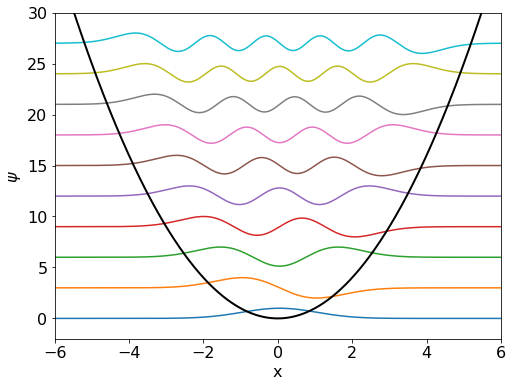

In [138]:
#calculating ground state and first 9 excited energy levels and wavefunctions of harmonic oscillator
c = 1e-3
E1 =  100 # start Energy search at the well depth
dE = 1
npoints = 2000

E_SM = []

fig = plt.figure()
ax = fig.add_subplot(111)
n=0
i=0

# Bound states must have E < 0 for the square well. 
# Cut off after we have found a few states
while (E1 < 2700-dE):
    
    if match(E1)*match(E1 + dE) < 0 :  # bracket E
        # find the energy
        E = rtf.bisect(match, E1, E1+dE, 1e-12)
        print('Energy found (harmonic): %.5f'%(E), "eV")
        E_SM.append(E)
        
        dx = 16*c/npoints
        
        # for plotting, must ensure overlap of left and right solutions 
        p_up = QM(E, npoints = npoints+10, x_start = -10, x_end = 0+10*dx)
        p_down = QM(E, npoints = npoints-10, x_start = 10, x_end = 0+10*dx)
        
        p_up.scipy_trajectory()
        p_down.scipy_trajectory()
        
        # scale factor
        scale = p_up.uv_end[0]/p_down.uv_end[0]
        
        # full solution, combine up and down solutions
        psi_x = np.concatenate((p_up.uv[:-1,0], scale*p_down.uv[::-1,0]))
        xa = np.linspace(-10,10, 2*npoints-1, endpoint = True)
        
        # plot the scaled solution (not normalized), scale maximum to 1 for plotting purposes
        ax.plot(xa, psi_x/max(psi_x)+n)
        i+=1
        n+=3 #offset the wavefunctions so we can see them all nicely
    E1 += dE
E1 =  100

# Solution is exact only for for wide and deep well, and odd n 
# a = 1e-11
# V0 = 50
# n = np.arange(1,5,2)
# Exact = -V0+np.pi**2/2/a**2*n**2
# print(Exact)

# plot the potential
ax.plot(xa, np.vectorize(p_up.Potential)(xa), color = 'k', lw =2)
ax.set_xlim([-6, 6])
ax.set_ylim([-2,30])
ax.set_xlabel('x')
ax.set_ylabel('$\psi$')
plt.show()

In [72]:
#Check that the energy levels are equally spaced
print("energy difference between:")
print("ground and 1st excited states = ", np.round(E_SM[1]-E_SM[0],3), "eV")
print("1st and 2nd excited states = ", np.round(E_SM[2]-E_SM[1],3), "eV")
print("8th and 9th excited states = ", np.round(E_SM[-1]-E_SM[-2],3), "eV")

energy difference between:
ground and 1st excited states =  276.169 eV
1st and 2nd excited states =  276.169 eV
8th and 9th excited states =  276.169 eV


As can be seen above, the energy levels are equally spaced.

Energy found (harmonic): 138.08462 eV
Energy found (harmonic): 414.25386 eV
Energy found (harmonic): 690.42309 eV
Energy found (harmonic): 966.59233 eV
Energy found (harmonic): 1242.76157 eV
Energy found (harmonic): 1518.93081 eV
Energy found (harmonic): 1795.10004 eV
Energy found (harmonic): 2071.26928 eV
Energy found (harmonic): 2347.43852 eV
Energy found (harmonic): 2623.60775 eV
Energy found (anharmonic): 241.13629 eV
Energy found (anharmonic): 780.79869 eV
Energy found (anharmonic): 1415.60194 eV
Energy found (anharmonic): 2118.15334 eV
Energy found (anharmonic): 2876.04264 eV
Energy found (anharmonic): 3681.45299 eV
Energy found (anharmonic): 4528.90729 eV
Energy found (anharmonic): 5414.30318 eV
Energy found (anharmonic): 6334.42731 eV
Energy found (anharmonic): 7286.67968 eV


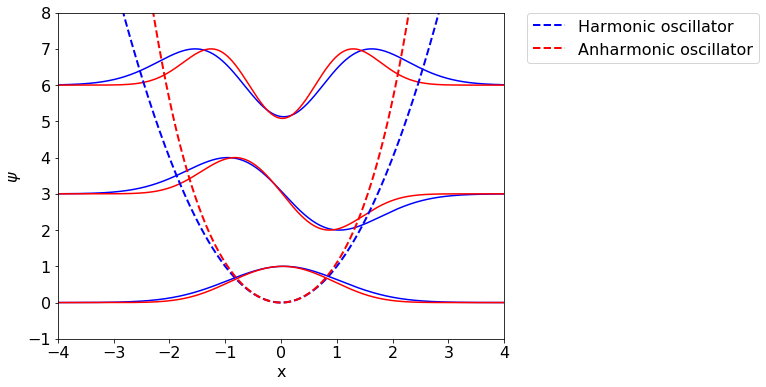

In [139]:
#plotting first three anharmonic and harmonic wavefunctions together and calculating first 10 energy levels of both
c = 1e-3
hbar = 6.582e-16
m = 9.1e-31
E1 =  100 # start Energy search at the well depth
dE = 1
npoints = 2000
n=0

E_SM = []
E_SM_anharm = []

fig = plt.figure()
ax = fig.add_subplot(111)

# Bound states must have E < 0 for the square well. 
# Cut off after we have found a few states
while (E1 < 2700-dE):
    
    if match(E1)*match(E1 + dE) < 0 :  # bracket E
        # find the energy
        E = rtf.bisect(match, E1, E1+dE, 1e-12)
        print('Energy found (harmonic): %.5f'%(E), "eV")
        E_SM.append(E)
        
        dx = 16*c/npoints
        
        # for plotting, must ensure overlap of left and right solutions 
        p_up = QM(E, npoints = npoints+10, x_start = -10, x_end = 0+10*dx)
        p_down = QM(E, npoints = npoints-10, x_start = 10, x_end = 0+10*dx)
        
        p_up.scipy_trajectory()
        p_down.scipy_trajectory()
        
        # scale factor
        scale = p_up.uv_end[0]/p_down.uv_end[0]
        
        # full solution, combine up and down solutions
        psi_x = np.concatenate((p_up.uv[:-1,0], scale*p_down.uv[::-1,0]))
        xa = np.linspace(-10,10, 2*npoints-1, endpoint = True)
        if E<700:
            # plot the scaled solution (not normalized), scale maximum to 1 for plotting purposes
            ax.plot(xa, psi_x/max(psi_x)+n, "b")
            n+=3
    E1 += dE
E1 =  100
n=0
while (E1 < 7300-dE): #7300
    if match_anharm(E1)*match_anharm(E1 + dE) < 0 :  # bracket E
        # find the energy
        E = rtf.bisect(match_anharm, E1, E1+dE, 1e-12)
        print('Energy found (anharmonic): %.5f'%(E), "eV")
        E_SM_anharm.append(E)
        
        dx = 16*c/npoints
        
        # for plotting, must ensure overlap of left and right solutions 
        p_up_a = QM_anharm(E, npoints = npoints+10, x_start = -10, x_end = 0+10*dx)
        p_down_a = QM_anharm(E, npoints = npoints-10, x_start = 10, x_end = 0+10*dx)
        
        p_up_a.scipy_trajectory_anharm()
        p_down_a.scipy_trajectory_anharm()
        
        # scale factor
        scale = p_up_a.uv_end[0]/p_down_a.uv_end[0]
        
        # full solution, combine up and down solutions
        psi_x_a = np.concatenate((p_up_a.uv[:-1,0], scale*p_down_a.uv[::-1,0]))
        xa = np.linspace(-5,5, 2*npoints-1, endpoint = True)
        if E<1420:
            # plot the scaled solution (not normalized), scale maximum to 1 for plotting purposes
            ax.plot(xa, psi_x_a/max(psi_x_a)+n, "r")
            n+=3
    #else : 
    #    print("No bracket, increasing energy to", E1+dE)
    E1 += dE

# Solution is exact only for for wide and deep well, and odd n 
# a = 1e-11
# V0 = 50
# n = np.arange(1,5,2)
# Exact = -V0+np.pi**2/2/a**2*n**2
# print(Exact)

# plot the potential
ax.plot(xa, np.vectorize(p_up.Potential)(xa), color = 'b', lw =2,linestyle = "--", label = "Harmonic oscillator")
ax.plot(xa, np.vectorize(p_up_a.Potential_anharm)(xa), color = 'r', lw =2,linestyle = "--", label = "Anharmonic oscillator")
ax.set_xlim([-4, 4])
ax.set_ylim([-1,8])
ax.set_xlabel('x')
ax.set_ylabel('$\psi$')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

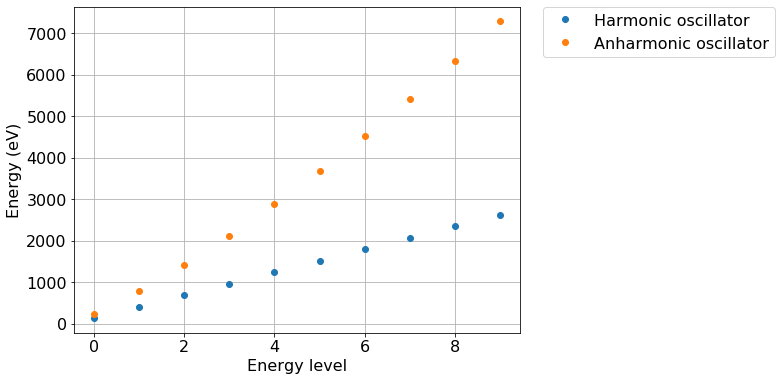

In [73]:
#plotting first 10 energy levels of harmonic and anharmonic oscillators together
#print(E_SM)
plt.plot(range(len(E_SM)),E_SM, "o", label = "Harmonic oscillator")
plt.plot(range(len(E_SM_anharm)), E_SM_anharm, "o", label = "Anharmonic oscillator")
plt.xlabel("Energy level")
plt.ylabel("Energy (eV)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid()

The energy level spacing is the same for the harmonic oscillator, but not for the anharmonic oscillator. The energy levels of the two systems diverge fairly quickly, the energy levels of the anharmonic oscillator increasing more rapidly than those of the harmonic oscillator since the spacing between energy levels in the anharmonic case is increasing whereas they're staying the same in the harmonic case.

Problem 2-

In [173]:
def box(phi):
    
    n, m = np.shape(phi)
    w = n//2
    h = n//4  #height for outter box
    j = n//20 #height for inner box
    
    right_out = w + h
    left_out = w - h 
    right_in = w+j
    left_in = w-j
    
    phi[h:3*h, left_out] = 0
    phi[h:3*h, right_out] = 0
    phi[h, left_out:right_out] = 0
    phi[3*h, left_out:right_out] = 0
    phi[9*j:11*j, left_in] = 1
    phi[9*j:11*j, right_in] = 1
    phi[9*j, left_in:right_in] = 1
    phi[11*j, left_in:right_in] = 1
    
    return phi

def parallel_plate_pnt(phi):
    n,m = np.shape(phi)
    r = n//200
    tol = np.sqrt(n**2 + m**2)
    w = n//2
    h = n//3  # span 1/3 of grid in height`

    X,Y = np.meshgrid(range(-n//2, n//2+1), range(-n//2, n//2+1))
    Z = np.sqrt((X)**2 + (Y)**2)
    
    idx = np.nonzero(abs(Z-r) < 1)
    phi[idx] =  1
 
    right = w + h//2 #position of plate 1
    left = w - h//2  # positioin of plate 2
    phi[h:2*h, left] = - 1
    phi[h:2*h, right] =  1
    
    return phi

def parallel_plate_pnt_move(phi):
    n,m = np.shape(phi)
    r = n//200
    tol = np.sqrt(n**2 + m**2)
    w = n//2
    h = n//3  # span 1/3 of grid in height`

    X,Y = np.meshgrid(range(-n//2, n//2+1), range(-n//2, n//2+1))
    Z = np.sqrt((X+n//16)**2 + (Y)**2)
    
    idx = np.nonzero(abs(Z-r) < 1)
    phi[idx] =  1
 
    right = w + h//2 #position of plate 1
    left = w - h//2  # positioin of plate 2
    phi[h:2*h, left] = - 1
    phi[h:2*h, right] =  1
    
    return phi

In [174]:
@jit
def jacobi(V,Vnew,M,N):
    for ii in range(M):
        for jj in range(N):
            if ii == 0 or jj == 0 or ii == M or jj == N:
                Vnew[ii,jj] = V[ii,jj]
            else :
                Vnew[ii,jj] = (V[ii+1,jj]+V[ii-1,jj]+V[ii,jj+1]+V[ii,jj-1])/4
    return Vnew

def invDel2_loops(b, boundary,  dx=1.0, converge = 1e-6):
    """ This is the Jacobi algorithim 
    Specialized to two dimensions so that plotting is easier.
    """
    V = boundary(np.zeros(b.shape, float))  # potential values at step n of the iteration   
    Vnew = np.zeros(b.shape, float) # updated potential 
    Npoints = len(b.flatten())

    t = 0  # transient before checking for convergence
    dV = converge*10  #make sure we run through transient
    
    while(dV > converge): 
        # move the loops outside to use jit
        Vnew = jacobi(V,Vnew,V.shape[0]-1,V.shape[1]-1)
        
        # enforce bc's at every iteration
        Vnew = boundary(Vnew)


        # wait for transient before checking convergence
        if t > 100 : 
            dV = np.sum(abs(Vnew - V))/Npoints
        # Note the explicit indexing (V[:,:]) without it Vnew will be updated with V
        V[:,:] = Vnew 
        # for mor complex objects i.e. list with sublists use deepcopy
        t+=1
   
    return Vnew

In [175]:
N = 100 #grid points
dx = 1/N

# generate coordinates for each grid point
# only required for plotting E-field
X,Y = np.meshgrid(range(-N//2, N//2+1), range(-N//2, N//2+1))

# the charge distrubution defines space for us
# empty space, no charge
rho = np.zeros([N+1, N+1])
#rho = pipe(rho)*-5000

# solution from relaxation

# using loops
phi = invDel2_loops(rho, box, dx)

# or using array slicing
#phi = invDel2(rho, parallel_plate, dx)


# Calculate the electric field
EY, EX = -1*np.array(np.gradient(phi))
magE = np.sqrt(EX**2 + EY**2)

# Note, this step was not completed in shared notebook, so plots will look a bit messy
# supress division by zero error output
np.seterr(divide = 'ignore', invalid = 'ignore')
EX= np.divide(EX,magE)
EY= np.divide(EY,magE)

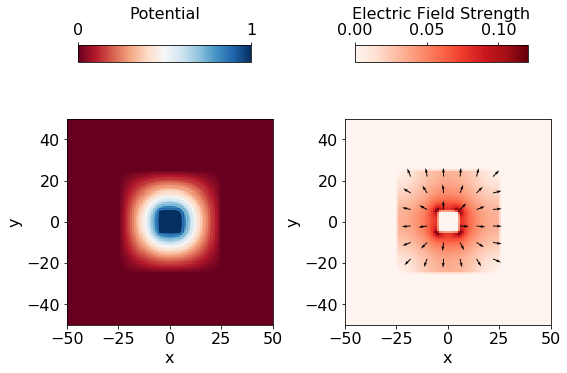

In [176]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 16
fig = plt.figure()
ax1 = fig.add_subplot(121)
plt.gca().set_aspect('equal', adjustable='box')
ax2 = fig.add_subplot(122)
plt.gca().set_aspect('equal', adjustable='box')

# plot potential
m1 = ax1.pcolormesh(X, Y, phi, cmap = 'RdBu')

# add an axes to put colorbar is custom location
cax1 = fig.add_axes([0.14,0.87,0.3,0.04])
# create colorbar
cbar = fig.colorbar(m1,cax1, orientation = 'horizontal', ticklocation = 'top', ticks = [-1,0,1])
cbar.set_label('Potential')

# add contour lines
ax1.contour(X,Y,phi, cmap = 'RdBu')
ax1.set_xlabel("x")
ax1.set_ylabel("y")

# plot E-field 
m2 = ax2.pcolormesh(X,Y,magE, cmap = 'Reds')

cax2 = fig.add_axes([0.62,0.87,0.3,0.04])
cbar2 = fig.colorbar(m2,cax2,orientation = 'horizontal', ticklocation = 'top' )
cbar2.set_label('Electric Field Strength')
ax2.quiver(X[::8,::8],Y[::8,::8],EX[::8,::8], EY[::8, ::8], units = 'width') 
ax2.set_xlabel("x")
ax2.set_ylabel("y")

fig.subplots_adjust(left = 0.12,right = 0.96, bottom = 0.14, top = 0.86,wspace =0.35, hspace = 0.35)

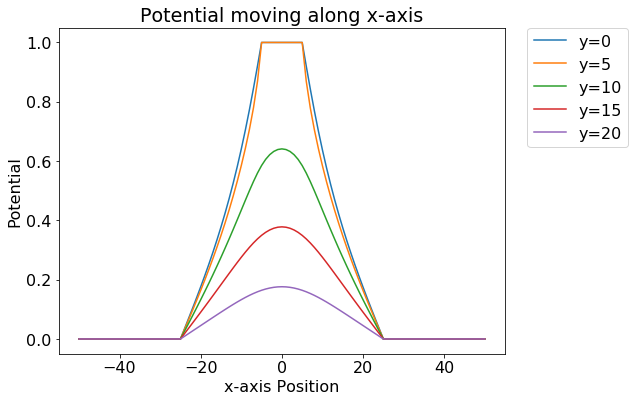

In [179]:
#one dimensional slices across rows of the grid.
x = np.linspace(-50, 50, 101)
plt.plot(x,phi[50,:], label = "y=0")
plt.plot(x,phi[45,:], label = "y=5")
plt.plot(x,phi[40,:], label = "y=10")
plt.plot(x,phi[35,:], label = "y=15")
plt.plot(x,phi[30,:], label = "y=20")
plt.xlabel("x-axis Position")
plt.ylabel("Potential")
plt.title("Potential moving along x-axis")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [118]:
N = 200 #grid points
dx = 1/N

# generate coordinates for each grid point
# only required for plotting E-field
X,Y = np.meshgrid(range(-N//2, N//2+1), range(-N//2, N//2+1))

# the charge distrubution defines space for us
# empty space, no charge
rho = np.zeros([N+1, N+1])
#rho = pipe(rho)*-5000

# solution from relaxation

# using loops
phi = invDel2_loops(rho, parallel_plate_pnt, dx)
beta = invDel2_loops(rho, parallel_plate_pnt_move, dx)

# or using array slicing
#phi = invDel2(rho, parallel_plate, dx)


# Calculate the electric field
EY, EX = -1*np.array(np.gradient(phi))
magE = np.sqrt(EX**2 + EY**2)

EY1, EX1 = -1*np.array(np.gradient(beta))
magE1 = np.sqrt(EX1**2 + EY1**2)

# supress division by zero error output
np.seterr(divide = 'ignore', invalid = 'ignore')
EX= np.divide(EX,magE)
EY= np.divide(EY,magE)

EX1= np.divide(EX1,magE1)
EY1= np.divide(EY1,magE1)

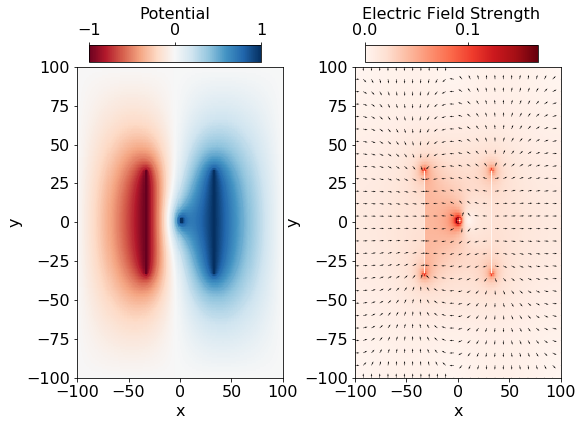

In [101]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 16
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# plot potential
m1 = ax1.pcolormesh(X, Y, phi, cmap = 'RdBu')

# add an axes to put colorbar is custom location
cax1 = fig.add_axes([0.14,0.87,0.3,0.04])
# create colorbar
cbar = fig.colorbar(m1,cax1, orientation = 'horizontal', ticklocation = 'top', ticks = [-1,0,1])
cbar.set_label('Potential')

# add contour lines
ax1.contour(X,Y,phi, cmap = 'RdBu')
ax1.set_xlabel("x")
ax1.set_ylabel("y")

# plot E-field 
m2 = ax2.pcolormesh(X,Y,magE, cmap = 'Reds')

cax2 = fig.add_axes([0.62,0.87,0.3,0.04])
cbar2 = fig.colorbar(m2,cax2,orientation = 'horizontal', ticklocation = 'top' )
cbar2.set_label('Electric Field Strength')
ax2.quiver(X[::8,::8],Y[::8,::8],EX[::8,::8], EY[::8, ::8], units = 'width') 
ax2.set_xlabel("x")
ax2.set_ylabel("y")

fig.subplots_adjust(left = 0.12,right = 0.96, bottom = 0.14, top = 0.86,wspace =0.35, hspace = 0.35)

When the point charge approaches the parallel plate with the same potential as the charge, it is like there is no point charge, but if it approaches the plate with opposite potential, it deforms the potential and the field, as can be seen below. The same thing happens when the point charge is in the middle, as can be seen in the plots above, although the deformation isn't as obvious. 

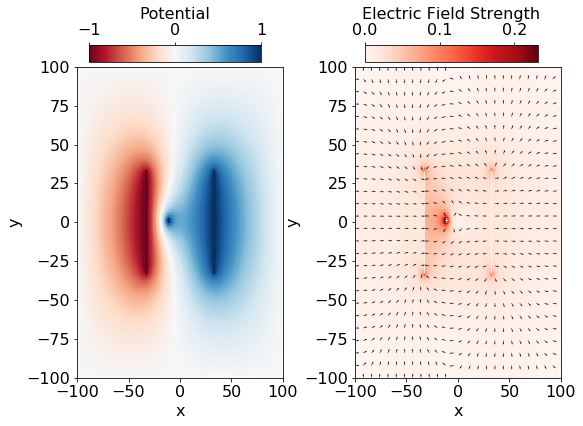

In [119]:
fig = plt.figure()
ax3 = fig.add_subplot(121)
ax4 = fig.add_subplot(122)

# plot potential
m3 = ax3.pcolormesh(X, Y, beta, cmap = 'RdBu')

# add an axes to put colorbar is custom location
cax3 = fig.add_axes([0.14,0.87,0.3,0.04])
# create colorbar
cbar = fig.colorbar(m3,cax3, orientation = 'horizontal', ticklocation = 'top', ticks = [-1,0,1])
cbar.set_label('Potential')

# add contour lines
ax3.contour(X,Y,beta, cmap = 'RdBu')
ax3.set_xlabel("x")
ax3.set_ylabel("y")

# plot E-field 
m4 = ax4.pcolormesh(X,Y,magE1, cmap = 'Reds')

cax4 = fig.add_axes([0.62,0.87,0.3,0.04])
cbar4 = fig.colorbar(m4,cax4,orientation = 'horizontal', ticklocation = 'top' )
cbar4.set_label('Electric Field Strength')
ax4.quiver(X[::8,::8],Y[::8,::8],EX1[::8,::8], EY1[::8, ::8], units = 'width') 
ax4.set_xlabel("x")
ax4.set_ylabel("y")

fig.subplots_adjust(left = 0.12,right = 0.96, bottom = 0.14, top = 0.86,wspace =0.35, hspace = 0.35)

In [39]:
t=2
a=0
while t<10000:
    a+=(2*np.pi*1e-6)**(-0.5)*t**(-1) #2**-t*
    t+=1

print(a)

3505.7076970608923
